### **Context:**
Here, we have  a dataset consisting of Cats and Dogs of about 25000 in size.
The problem statement is to build a model that can classify between a cat and a dog in an image as accurately as possible.

Image sizes range from roughly 100x100 pixels to 2000x1000 pixels.
Images Array Link: https://drive.google.com/file/d/1cn0_Ep53fYJtujvxmMo64kP3egvtG40u/view?usp=sharing
Labels Array Link: https://drive.google.com/file/d/1vdRn4Qyle1rEk0asTq27ISsMq3IgT7LI/view?usp=sharing




### **Objective:**

The aim of this project is to **Build a Convolutional Neural Network to classify between a cat and a dog in an image.**


### **Data Description:**
The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Label.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining whether the image is a cat or a dog.

**List of images**

- Cat
- Dog




####**Note: Please use GPU runtime to execute the code efficiently**


## **Importing the necessary libraries**

In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **Reading the dataset**

In [ ]:
# Mount Google drive to access the dataset (monkeys_dataset.zip)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the image file of dataset
images = np.load('/content/drive/MyDrive/Cat and Dog/image_array.npy')

# Load the labels file of dataset
labels = pd.read_csv('/content/drive/MyDrive/Cat and Dog/labels_array.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## **Overview of the dataset**


Let's print the shape of the images and labels

In [ ]:
print(images.shape)
print(labels.shape)

(25000, 64, 64, 3)
(25000, 1)


There are 25,000 BGR  images of shape 64 x 64 X 3 each. As mentioned, each image is an BGR image having 3 channels

<b>Converting the BGR images to RGB images.

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

In [ ]:
np.unique(labels)

array(['cat', 'dog'], dtype=object)

## **Exploratory Data Analysis**

In [ ]:
def plot_images(images,labels):
  # num_classes=10                                                                  # Number of Classes
  # categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
          plt.tight_layout()
  plt.show()

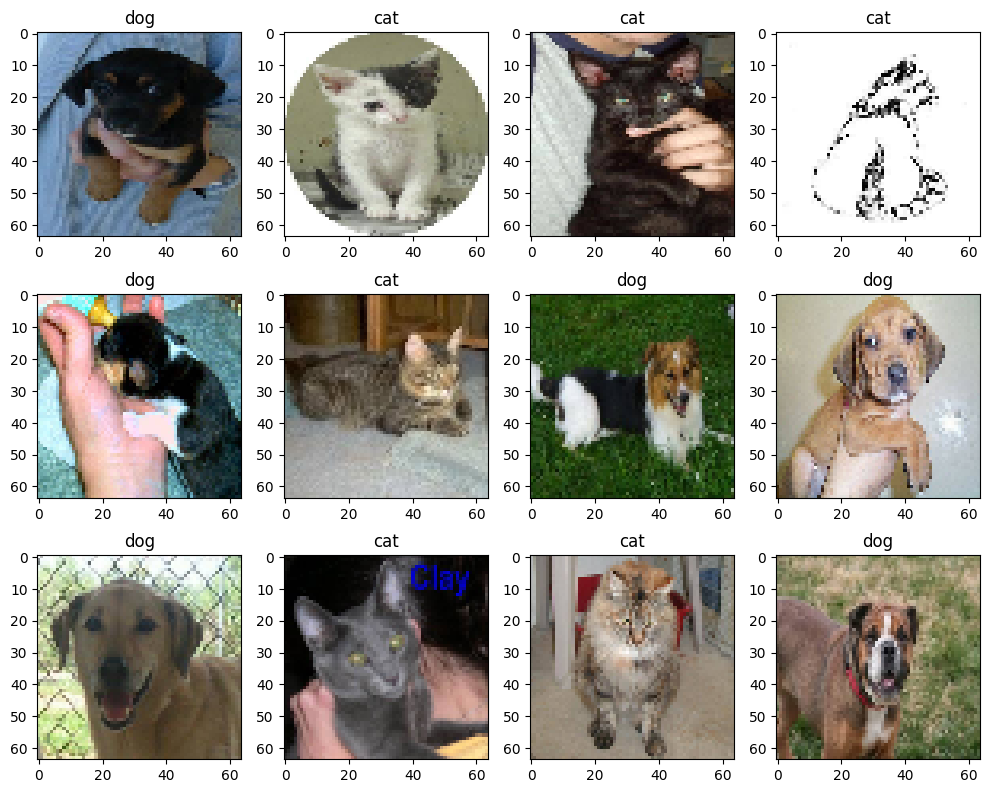

In [ ]:
plot_images(images,labels)

<b> Checking for data imbalance

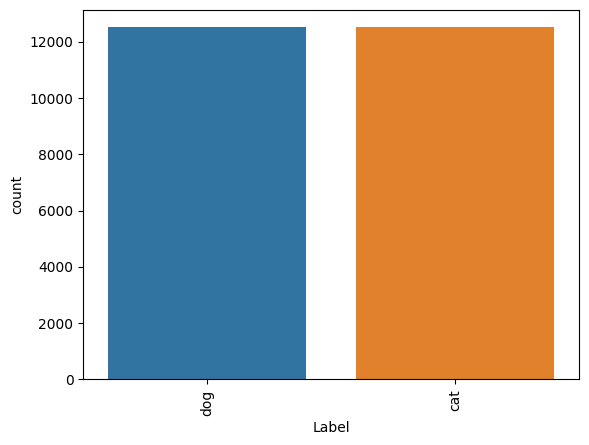

In [ ]:
sns.countplot(data = labels, x = "Label")
plt.xticks(rotation=90);

- As you can observe from the above plot, the dataset is balanced.

## **Splitting the dataset**




In [ ]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images),labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(20250, 64, 64, 3) (20250, 1)
(2250, 64, 64, 3) (2250, 1)
(2500, 64, 64, 3) (2500, 1)


## **Making the data compatible:**

- Convert labels from names to one hot vectors
- Normalizing the values


## Encoding the target labels

In [ ]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
enc = LabelEncoder()
y_train = enc.fit_transform(y_train)
y_val = enc.transform(y_val)
y_test = enc.transform(y_test)

In [ ]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train_enc = to_categorical(y_train)
y_val_enc = to_categorical(y_val)
y_test_enc = to_categorical(y_test)

In [ ]:
y_train_enc.shape,y_val_enc.shape,y_test_enc.shape

((20250, 2), (2250, 2), (2500, 2))

## Data Normalization
Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [ ]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## **Model Building - Convolutional Neural Network (CNN)**
Let's create a CNN model sequentially, where we will be adding the layers one after another.

First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data.

In Keras, we need a special command to clear the model's history, otherwise the previous model history remains in the backend.

Also, let's fix the seed again after clearing the backend.

Let's **set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow** to be able to reproduce the same results every time we run the code.

# Transfer Learning using VGG16

- We will be using the idea of **Transfer Learning**. We will be loading a pre-built architecture - **VGG16**, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

- For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will replace the existing fully-connected layers with FC layers created specifically for our problem.


In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
model_filepath = "/content/drive/MyDrive/Cat and Dog/vgg_model.h5"
chkpt = ModelCheckpoint(model_filepath, verbose = 1, save_best_only=True)
es = EarlyStopping(patience=3, verbose = 1)

In [ ]:
vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))   # Importing the VGG16 Model with pretrained ImageNet weights
vgg_model.summary()                                                                   # Summary of the VGG16 Model without the dense layers

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
model = Sequential()

# Adding the convolutional part of the VGG16 model from above
model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model.add(Flatten())

# Adding a dense layer
model.add(Dense(32, activation='relu'))
# Adding droput layer with 0.2 dropout rate
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
# Adding the output layer with 12 neurons
model.add(Dense(2, activation='sigmoid'))
opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Epochs
epochs = 10
# Batch size
batch_size = 64
# Fit the model with augmented data
history_vgg16 = model.fit(X_train_normalized,y_train_enc, batch_size=batch_size, shuffle=False,
                          epochs=epochs,
                          validation_split=0.2,
                          verbose=1, callbacks = [es, chkpt])

Epoch 1/10
252/254 [============================>.] - ETA: 0s - loss: 0.4925 - accuracy: 0.7581
Epoch 1: val_loss improved from inf to 0.43632, saving model to /content/drive/MyDrive/Cat and Dog/vgg_model.h5
254/254 [==============================] - 10s 34ms/step - loss: 0.4920 - accuracy: 0.7585 - val_loss: 0.4363 - val_accuracy: 0.7923
Epoch 2/10
253/254 [============================>.] - ETA: 0s - loss: 0.4278 - accuracy: 0.8005
Epoch 2: val_loss improved from 0.43632 to 0.42337, saving model to /content/drive/MyDrive/Cat and Dog/vgg_model.h5
254/254 [==============================] - 9s 36ms/step - loss: 0.4278 - accuracy: 0.8005 - val_loss: 0.4234 - val_accuracy: 0.8032
Epoch 3/10
252/254 [============================>.] - ETA: 0s - loss: 0.4050 - accuracy: 0.8152
Epoch 3: val_loss improved from 0.42337 to 0.41600, saving model to /content/drive/MyDrive/Cat and Dog/vgg_model.h5
254/254 [==============================] - 8s 32ms/step - loss: 0.4045 - accuracy: 0.8156 - val_loss: 0

### Plotting the Epoch vs Accuracy curve

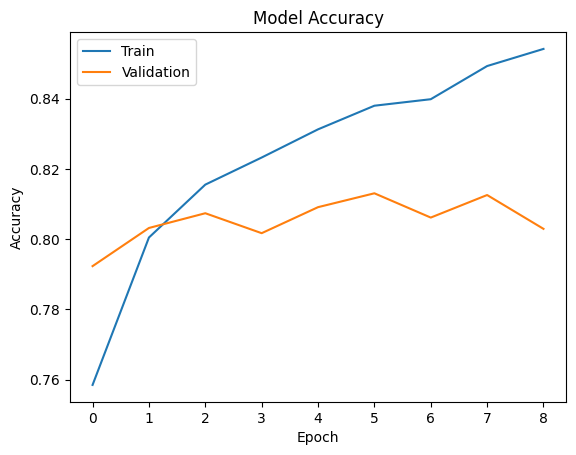

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Observations
- We can observe that the VGG16 model is generalized with good accuracy but it is not better than our previous model(model-2).

### Accuracy of the VGG16 Model

In [ ]:
# Getting the accuracy of the model
accuracy = model.evaluate(X_test_normalized, y_test_enc, verbose=2)

79/79 - 2s - loss: 0.4129 - accuracy: 0.8176 - 2s/epoch - 26ms/step


In [ ]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

79/79 [==============================] - 1s 14ms/step


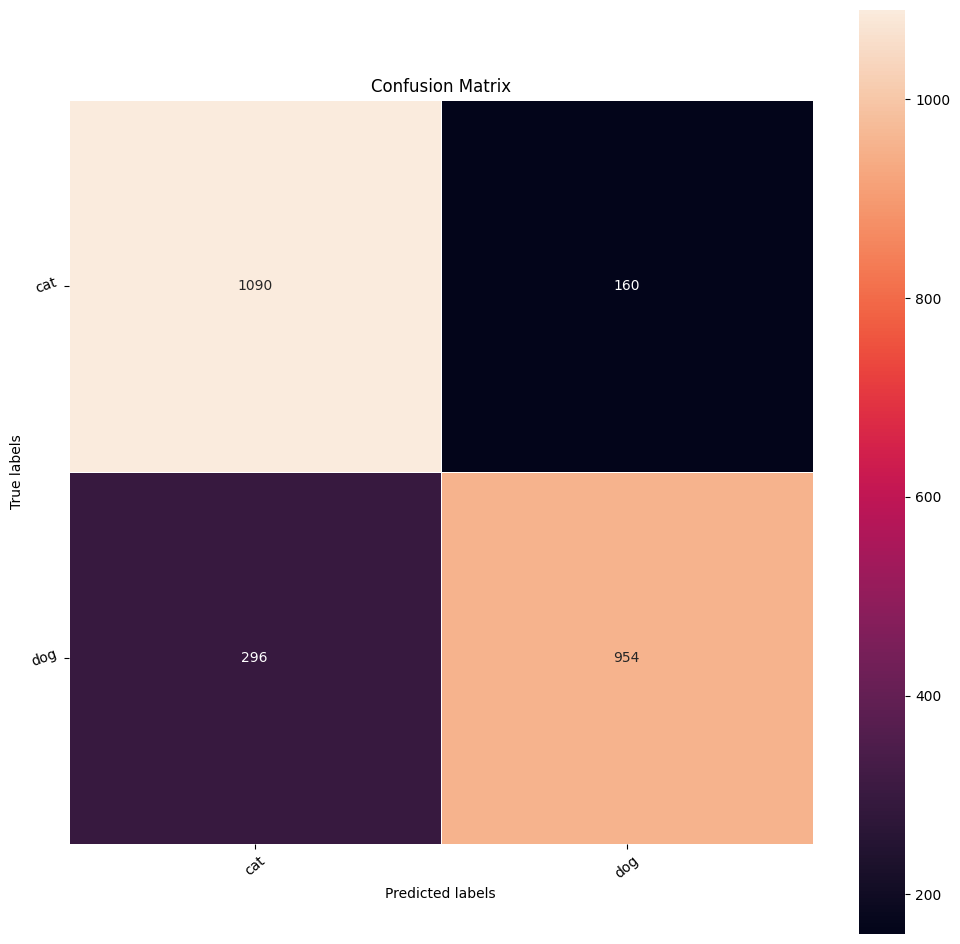

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_enc,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

### Observations
- According to the confusion matrix and accuracy curve, the VGG16 model does not outperform Model-2. This could be due to the data we're using; since we're using plant seedlings data, there's a chance that these images aren't in the ImageNet dataset, whose weights have been used to build our CNN model.
- Although VGGnet did not outperform Model-2, it is evident that simply employing the transfer learning model without any tuning performed can produce a better outcome than any ordinary CNN.
- Thus we can say that Model-2 is our best model and we can use it model to classify plant seedlings.


### Comparing the model performance

In [ ]:
pd.DataFrame({'Models':['Base CNN Model','CNN Model with Data Augmentation','Transfer Learning Model'],'Train Accuracy':['58%','74%','63%'],'Validation Accuracy':['69%','76%','58%'],'Test Accuracy':['70%','76%','60%']})

,Models,Train Accuracy,Validation Accuracy,Test Accuracy
0,Base CNN Model,58%,69%,70%
1,CNN Model with Data Augmentation,74%,76%,76%
2,Transfer Learning Model,63%,58%,60%


* Transfer learning model provided a generalized performance as compared to the base CNN model.
* Model-2 with data augmentation outperformed the other two models.